In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


<Axes: xlabel='timepoint', ylabel='signal'>

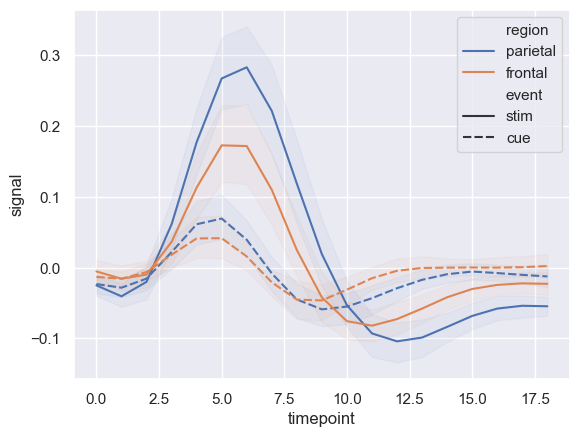

In [2]:
# lineplot() 函数绘制了一个多变量折线图，用于可视化不同事件（event）和不同脑区（region）随时间（timepoint）变化的信号强度（signal）。

sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data
fmri = pd.read_csv("seaborn-data/fmri.csv")
display(fmri)

# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri,
             # 指定误差区间的计算和显示方式。"ci"：表示使用 置信区间（Confidence Interval）。95：置信水平为 95%（默认值）。
             errorbar=('ci',95),
             err_kws={"alpha": 0.05}
             )

,A,B,C,D
2016-03-11,-5.469025,0.150611,-6.750804,1.964149
2016-07-18,-19.898453,12.024810,-1.464466,13.860848
2016-04-18,-10.804067,4.912127,-7.628996,7.324983
2016-04-08,-7.929166,2.579004,-8.923954,6.408947
2016-06-25,-11.980260,10.469725,-5.694896,13.517805
2016-04-05,-9.960628,1.725685,-9.044432,6.124586
2016-01-12,-4.962191,1.166590,-0.845742,2.924547
2016-06-27,-13.239042,9.553475,-7.019247,13.213907
2016-02-15,0.166129,0.175042,3.670841,-3.532414
2016-10-26,-14.786880,9.730580,-5.717337,8.682398


<Axes: >

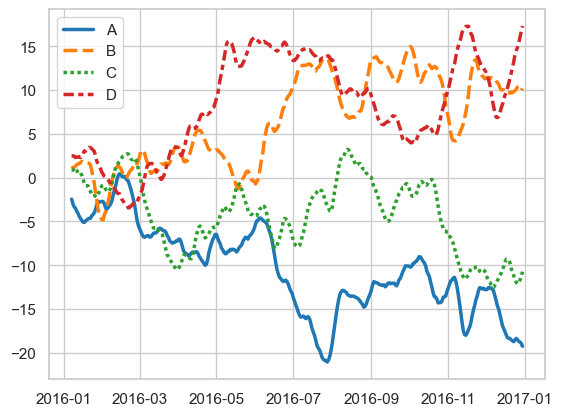

In [3]:
sns.set_theme(style="whitegrid")

rs = np.random.RandomState(365)     # 创建一个随机数生成器，种子设为365（保证每次运行结果相同）
values = rs.randn(365, 4).cumsum(axis=0)    # 生成365行×4列的数组，元素来自标准正态分布（均值0，方差1）。沿行方向（axis=0）计算累积和，将随机游走转换为趋势数据。
dates = pd.date_range("1 1 2016", periods=365, freq="D")    # 生成从2016年1月1日开始的365个连续日期（freq="D"表示按天）。
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])

display(data.sample(10))

data = data.rolling(7).mean()   # 创建7天的滑动窗口, 之后计算移动平均数

sns.lineplot(data=data, palette="tab10", linewidth=2.5)